# Cafe Recommender System Using Sentiment Analysis

## Extract, Transform, and Loading Data
We will be using cafe_data.csv and review.csv which includes about 1500 textual reviews of 16 different cafes from Google Maps

In [35]:
import pandas as pd
import numpy as np
import nltk

# load csv file 

review_data = pd.read_csv('review.csv', names=['user_id','text','cafe_id'], usecols=[1,3,4])

cafe_data = pd.read_csv('cafe_data.csv', names=['cafe_id','cafe_name'], usecols=[0,1])

# we will be using cafe_data.csv to get cafe_name that matches the cafe_id of the samples in review.csv 

df = pd.merge(cafe_data, review_data)

df = df.iloc[1:]

df.reset_index(inplace=True)

df

,index,cafe_id,cafe_name,user_id,text
0,1,1,Elixr Coffee Roasters,619,"As a visitor from Miami, my experience at Elix..."
1,2,1,Elixr Coffee Roasters,298,Elixr was a nice spot on a busy Saturday in Ph...
2,3,1,Elixr Coffee Roasters,620,This is my first time coming and I ordered the...
3,4,1,Elixr Coffee Roasters,267,I ordered the iced strawberry oat milk latte a...
4,5,1,Elixr Coffee Roasters,621,Cozy little coffee shop with well crafted latt...
...,...,...,...,...,...
2019,2020,75,Rival Bros Coffee Bar,1484,"Excellent coffee, really great service, cozy a..."
2020,2021,75,Rival Bros Coffee Bar,1485,Very fast and friendly service. Great latte.
2021,2022,75,Rival Bros Coffee Bar,1486,Perfect place to relax with a cup of coffee
2022,2023,75,Rival Bros Coffee Bar,1487,Wonderful drinks and a beautiful space


## NLTK

In [39]:
example = df['text'][3]

# tokenize

tokens = nltk.word_tokenize(example)
print(tokens)

['I', 'ordered', 'the', 'iced', 'strawberry', 'oat', 'milk', 'latte', 'and', 'dare', 'I', 'say', 'it', '’', 's', 'my', 'favorite', 'flavored', 'latte', 'I', '’', 've', 'ever', 'had', '?', '!', 'I', 'also', 'LOVE', 'how', 'cozy', 'and', 'quaint', 'it', 'is', ';', 'located', 'on', 'one', 'of', 'the', 'side', 'roads', 'off', 'of', 'Walnut', 'St', ',', 'you', 'have', 'to', 'know', 'about', 'this', 'place', 'to', 'get', 'there', 'lol', '.', 'But', 'the', 'interior', 'is', 'so', 'nice', 'and', 'calming', '.', 'I', 'definitely', 'recommend', 'visiting', 'Elixr', '!', '!']


In [40]:
# get part of speech each token is
tagged = nltk.pos_tag(tokens)

# group the tokens into chunks of texts
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  ordered/VBD
  the/DT
  iced/JJ
  strawberry/NN
  oat/NN
  milk/NN
  latte/NN
  and/CC
  dare/NN
  I/PRP
  say/VBP
  it/PRP
  ’/VBZ
  s/JJ
  my/PRP$
  favorite/JJ
  flavored/JJ
  latte/NN
  I/PRP
  ’/VBP
  ve/JJ
  ever/RB
  had/VBD
  ?/.
  !/.
  I/PRP
  also/RB
  (ORGANIZATION LOVE/NNP)
  how/WRB
  cozy/NN
  and/CC
  quaint/NN
  it/PRP
  is/VBZ
  ;/:
  located/VBN
  on/IN
  one/CD
  of/IN
  the/DT
  side/NN
  roads/VBZ
  off/IN
  of/IN
  (PERSON Walnut/NNP St/NNP)
  ,/,
  you/PRP
  have/VBP
  to/TO
  know/VB
  about/IN
  this/DT
  place/NN
  to/TO
  get/VB
  there/RB
  lol/JJ
  ./.
  But/CC
  the/DT
  interior/NN
  is/VBZ
  so/RB
  nice/JJ
  and/CC
  calming/VBG
  ./.
  I/PRP
  definitely/RB
  recommend/VBP
  visiting/VBG
  (PERSON Elixr/NNP)
  !/.
  !/.)


## Sentiment Analysis with NLTK VADER

In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

# get polarity score 
sia = SentimentIntensityAnalyzer()

score = sia.polarity_scores(example)
print(score)

{'neg': 0.102, 'neu': 0.631, 'pos': 0.267, 'compound': 0.8457}


In [41]:
# run the polarity scores on the entire dataset
result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    itext = row['text']
    id = row['index']
    result[id] = sia.polarity_scores(itext)

100%|██████████| 2024/2024 [00:00<00:00, 5757.90it/s]


In [42]:
vaders = pd.DataFrame(result).T
vaders

,neg,neu,pos,compound
1,0.000,0.810,0.190,0.8016
2,0.044,0.734,0.222,0.8402
3,0.000,1.000,0.000,0.0000
4,0.000,0.694,0.306,0.9733
5,0.102,0.631,0.267,0.8457
...,...,...,...,...
2020,0.000,0.382,0.618,0.8439
2021,0.000,0.398,0.602,0.8207
2022,0.000,0.476,0.524,0.7650
2023,0.000,0.283,0.717,0.8225


In [43]:
# merge all scores data with df and drop all other scores expect compound
vaders = vaders.reset_index().rename(columns={'index': 'index'}).drop(columns=['pos', 'neu', 'neg'])
df = df.merge(vaders, how='left')
df

,index,cafe_id,cafe_name,user_id,text,compound
0,1,1,Elixr Coffee Roasters,619,"As a visitor from Miami, my experience at Elix...",0.8016
1,2,1,Elixr Coffee Roasters,298,Elixr was a nice spot on a busy Saturday in Ph...,0.8402
2,3,1,Elixr Coffee Roasters,620,This is my first time coming and I ordered the...,0.0000
3,4,1,Elixr Coffee Roasters,267,I ordered the iced strawberry oat milk latte a...,0.9733
4,5,1,Elixr Coffee Roasters,621,Cozy little coffee shop with well crafted latt...,0.8457
...,...,...,...,...,...,...
2019,2020,75,Rival Bros Coffee Bar,1484,"Excellent coffee, really great service, cozy a...",0.8439
2020,2021,75,Rival Bros Coffee Bar,1485,Very fast and friendly service. Great latte.,0.8207
2021,2022,75,Rival Bros Coffee Bar,1486,Perfect place to relax with a cup of coffee,0.7650
2022,2023,75,Rival Bros Coffee Bar,1487,Wonderful drinks and a beautiful space,0.8225


## Sentiment Analysis with Huggingface ROBERTa Transformers
We will be using a using a specific model that has been pretained on labeled twitter comments so that we can use the trained weights and apply it to our data

In [44]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

#load pretrained model
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [45]:
print(example)
sia.polarity_scores(example)

I ordered the iced strawberry oat milk latte and dare I say it’s my favorite flavored latte I’ve ever had?! I also LOVE how cozy and quaint it is; located on one of the side roads off of Walnut St, you have to know about this place to get there lol. But the interior is so nice and calming. I definitely recommend visiting Elixr!!


{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'compound': 0.9733}

In [46]:
#tokenizing the text and encoding it into numbers, and runs it through the model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()

#softmax converts the raw scores into ptobabilities 
scores = softmax(scores)

#creating a dictionary for the scores 
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': np.float32(0.0011716936), 'roberta_neu': np.float32(0.0065231305), 'roberta_pos': np.float32(0.9923052)}


In [47]:
#running polarity scores with both vader and roberta
def roberta_polarity_scores(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_form = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_form

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    
    itext = row['text']
    id = row['index']
    result = sia.polarity_scores(itext)

    result2 = roberta_polarity_scores(itext)
    both = {**result, **result2}
    res[id] = both

100%|██████████| 2024/2024 [01:25<00:00, 23.80it/s]


In [48]:
both

{'neg': 0.064,
 'neu': 0.851,
 'pos': 0.085,
 'compound': 0.2023,
 'roberta_neg': np.float32(0.016600743),
 'roberta_neu': np.float32(0.1299596),
 'roberta_pos': np.float32(0.8534397)}

In [49]:
result_df = pd.DataFrame(res).T
result_df = result_df.reset_index().rename(columns={'index': 'index'})
result_df = result_df.merge(df, how='left')

result_df

,index,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,cafe_id,cafe_name,user_id,text
0,1,0.000,0.810,0.190,0.8016,0.000969,0.010831,0.988200,1,Elixr Coffee Roasters,619,"As a visitor from Miami, my experience at Elix..."
1,2,0.044,0.734,0.222,0.8402,0.007438,0.066463,0.926098,1,Elixr Coffee Roasters,298,Elixr was a nice spot on a busy Saturday in Ph...
2,3,0.000,1.000,0.000,0.0000,0.628752,0.267556,0.103693,1,Elixr Coffee Roasters,620,This is my first time coming and I ordered the...
3,4,0.000,0.694,0.306,0.9733,0.001172,0.006523,0.992305,1,Elixr Coffee Roasters,267,I ordered the iced strawberry oat milk latte a...
4,5,0.102,0.631,0.267,0.8457,0.001395,0.014101,0.984504,1,Elixr Coffee Roasters,621,Cozy little coffee shop with well crafted latt...
...,...,...,...,...,...,...,...,...,...,...,...,...
2019,2020,0.000,0.382,0.618,0.8439,0.002016,0.018121,0.979864,75,Rival Bros Coffee Bar,1484,"Excellent coffee, really great service, cozy a..."
2020,2021,0.000,0.398,0.602,0.8207,0.001629,0.020759,0.977612,75,Rival Bros Coffee Bar,1485,Very fast and friendly service. Great latte.
2021,2022,0.000,0.476,0.524,0.7650,0.001852,0.035305,0.962843,75,Rival Bros Coffee Bar,1486,Perfect place to relax with a cup of coffee
2022,2023,0.000,0.283,0.717,0.8225,0.001443,0.016044,0.982513,75,Rival Bros Coffee Bar,1487,Wonderful drinks and a beautiful space


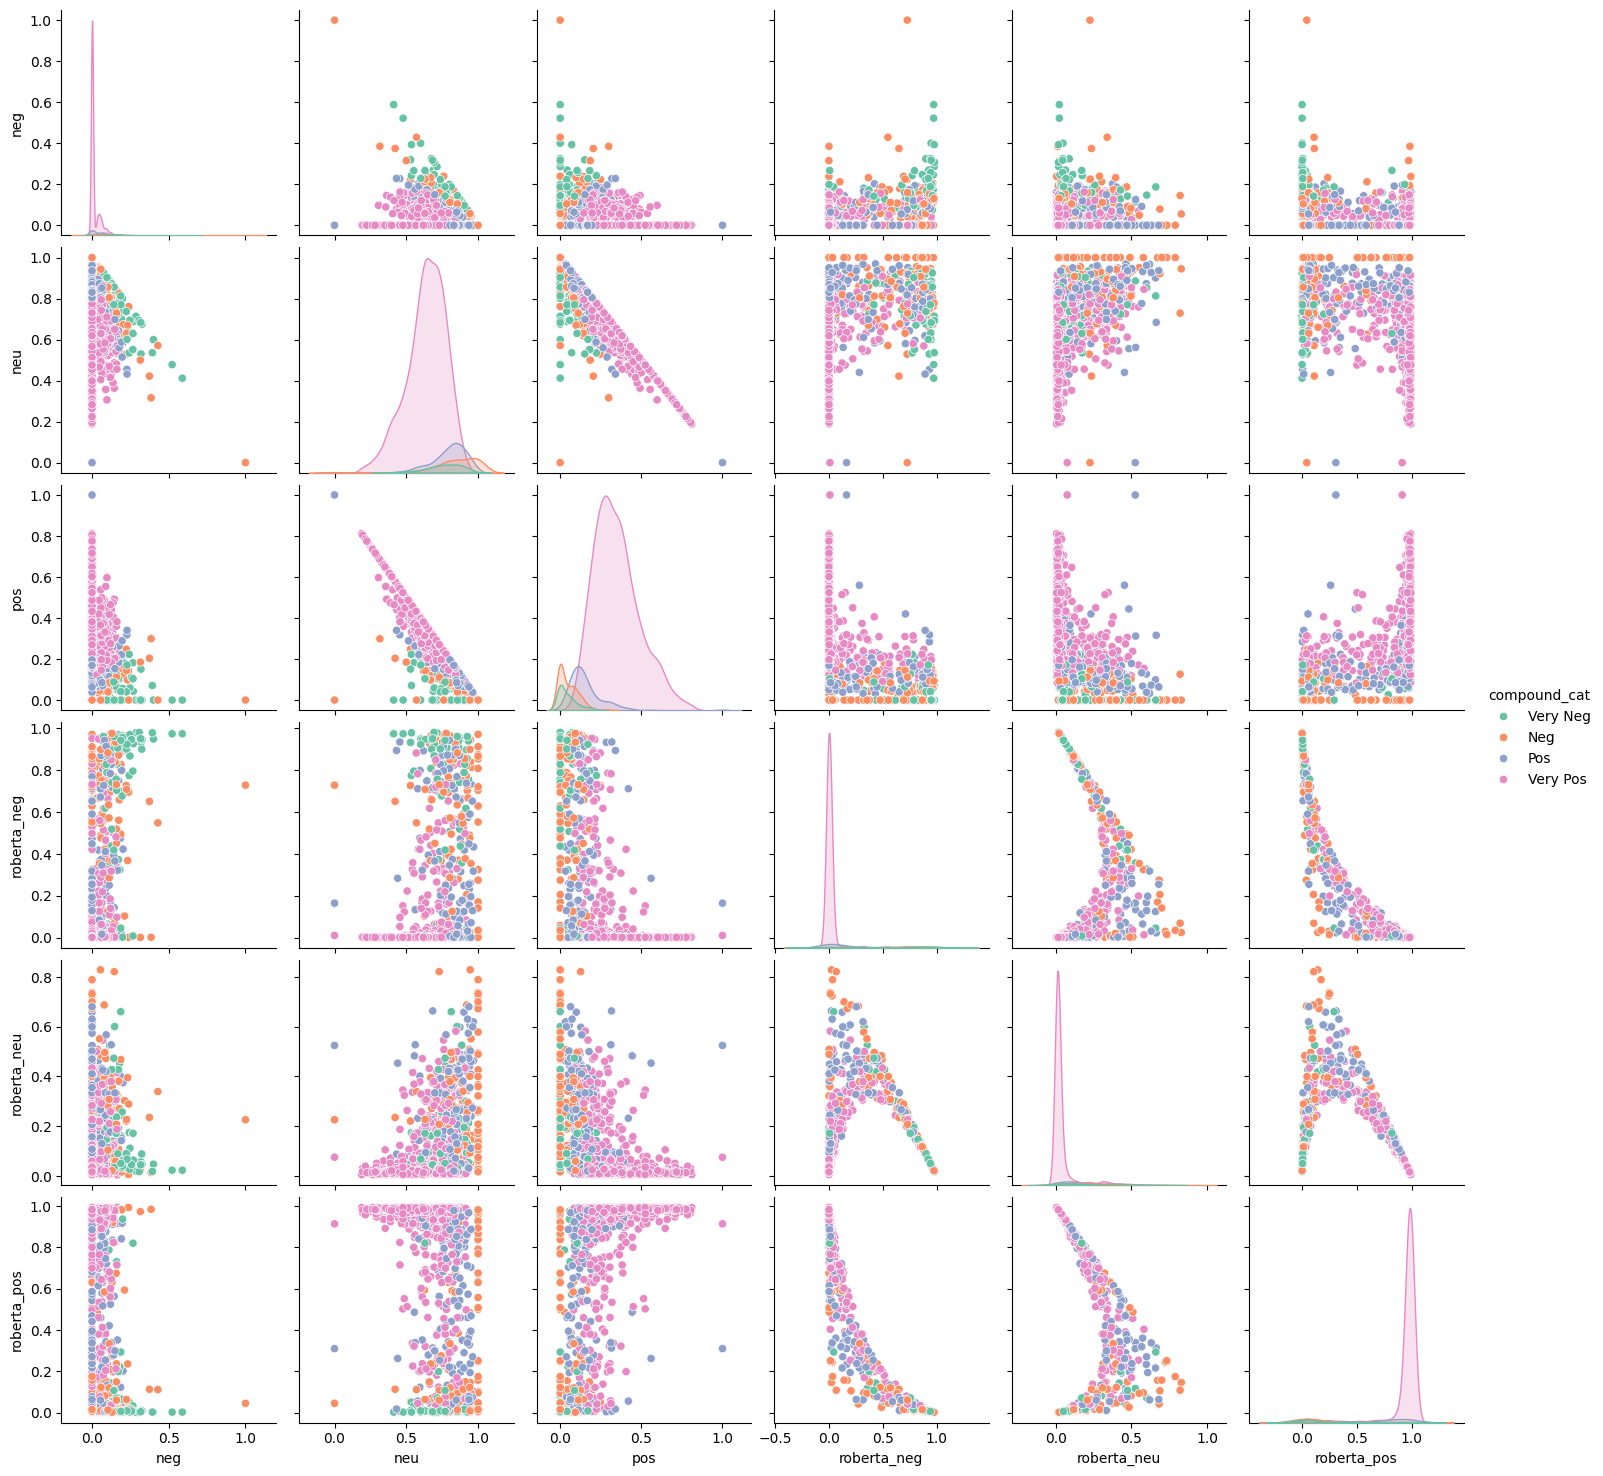

In [82]:
import seaborn as sns

# result_df['compound_rounded'] = df['compound'].round(1)

# sns.pairplot(data=result_df, 
#              vars=['neg', 'neu', 'pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'], 
#              hue='compound_rounded', 
#              palette='tab10')

# plt.show()

result_df['compound_cat'] = pd.cut(df['compound'], bins=[-1, -0.5, 0, 0.5, 1], labels=['Very Neg', 'Neg', 'Pos', 'Very Pos'])

sns.pairplot(data=result_df, 
             vars=['neg', 'neu', 'pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'], 
             hue='compound_cat', 
             palette='Set2')

## Item-Based Collaborative Filtering - Recommender System

In [ ]:
# train and test spliting
train_list = []
test_list = []

# leave-one-split
for user_id, group in df.groupby('user_id'):
    if len(group) < 2:
        train_list.append(group)  # too few ratings, skip test
    else:
        test_sample = group.sample(n=1, random_state=42)
        train_sample = group.drop(test_sample.index)
        test_list.append(test_sample)
        train_list.append(train_sample)

train_df = pd.concat(train_list)
test_df = pd.concat(test_list)


In [53]:
user_ratings_train = train_df.pivot_table(index='user_id', columns='cafe_name', values='compound')
user_ratings_test = test_df.pivot_table(index='user_id', columns='cafe_name', values='compound')

In [54]:
print(user_ratings_train.shape)
print(user_ratings_test.shape)

(1865, 23)
(105, 22)


In [56]:
from sklearn.metrics.pairwise import cosine_similarity
pd.DataFrame(
        cosine_similarity(user_ratings_train.fillna(0).T),
        index=user_ratings_train.columns,
        columns=user_ratings_train.columns
    )

cafe_name,Alchemy Coffee,Black Turtle Coffee,Bluestone Lane Arch Street Coffee Shop,CNT Cafe,Cafe Ole,Café Tolia,Chapterhouse Cafe & Gallery,Elixr Coffee Roasters,Enswell,Good Karma Cafe,...,Le Pain Quotidien,Matcha Panda Cafe,Nook Bakery & Coffee Bar,Peddler Coffee,Rival Bros Coffee Bar,The Ground Rittenhouse,The Last Drop Coffee House,Time & Peace Café and Gallery,Vernick Coffee Bar,Vibrant Coffee Roasters & Bakery
cafe_name,,,,,,,,,,,,,,,,,,,,,
Alchemy Coffee,1.000000,0.052517,0.000000,0.000000,0.000000,0.0,0.000000,0.009219,0.037015,-0.009590,...,0.000000,0.000000,0.025677,0.009572,0.000000,0.013172,0.034753,0.000000,0.015708,0.029781
Black Turtle Coffee,0.052517,1.000000,0.000000,0.000000,0.007540,0.0,0.000000,0.007085,0.008557,0.000000,...,0.000000,0.000000,0.005833,0.000000,0.014403,0.006184,0.011360,0.000000,0.009271,0.017534
Bluestone Lane Arch Street Coffee Shop,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.017497,0.000000,...,0.000000,0.000000,0.015617,0.000000,0.000000,0.000000,0.000000,0.000000,0.016696,0.000000
CNT Cafe,0.000000,0.000000,0.000000,1.000000,0.012557,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cafe Ole,0.000000,0.007540,0.000000,0.012557,1.000000,0.0,0.000000,0.013344,0.000000,0.000000,...,0.000000,0.000000,0.009873,0.000000,0.027129,0.001220,0.009047,0.015761,0.000000,0.016265
Café Tolia,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Chapterhouse Cafe & Gallery,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.014980,0.000000,...,0.000000,0.000000,0.000000,0.018341,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Elixr Coffee Roasters,0.009219,0.007085,0.000000,0.000000,0.013344,0.0,0.000000,1.000000,0.000000,0.000000,...,0.017470,0.000000,0.000000,0.021351,0.025489,0.000000,0.008501,0.000000,0.000000,0.029732
Enswell,0.037015,0.008557,0.017497,0.000000,0.000000,0.0,0.014980,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.015444,0.023144,0.000000,0.013758,0.042411,0.000000,0.016512,0.019798


In [60]:
from sklearn.metrics.pairwise import cosine_similarity

def predict_item_based(train_matrix, test_matrix, k=5):
    item_sim = pd.DataFrame(
        cosine_similarity(train_matrix.fillna(0).T),
        index=train_matrix.columns,
        columns=train_matrix.columns
    )

    predictions = []

    for user in test_matrix.index:
        for item in test_matrix.columns:
            if pd.notna(test_matrix.loc[user, item]):
                sims = item_sim[item].drop(item, errors='ignore')
                neighbors = sims.dropna().sort_values(ascending=False).head(k)

                numerator = 0.0 
                denominator = 0.0

                for neighbor_item, sim_score in neighbors.items():
                    neighbor_rating = train_matrix.loc[user, neighbor_item] 
                    if pd.notna(neighbor_rating):
                        numerator += sim_score * neighbor_rating
                        denominator += abs(sim_score)

                if denominator > 0:
                    predicted = numerator / denominator
                else:
                    predicted = np.nan 

                predictions.append((test_matrix.loc[user, item], predicted))

    return predictions

In [61]:
predict_item_based(user_ratings_train, user_ratings_test, k=5)

[(np.float64(0.7745), np.float64(0.9666)),
 (np.float64(0.8462), nan),
 (np.float64(0.5411), nan),
 (np.float64(0.8428), nan),
 (np.float64(0.7776), np.float64(0.8907999999999999)),
 (np.float64(0.9151), nan),
 (np.float64(-0.5983), nan),
 (np.float64(0.9815), np.float64(0.9291237521706377)),
 (np.float64(0.5487), nan),
 (np.float64(0.9085), np.float64(0.9052558466748467)),
 (np.float64(0.9022), nan),
 (np.float64(0.7717), nan),
 (np.float64(0.9493), nan),
 (np.float64(0.9441), nan),
 (np.float64(0.8511), nan),
 (np.float64(0.6588), nan),
 (np.float64(0.8591), nan),
 (np.float64(0.9186), nan),
 (np.float64(0.4939), np.float64(0.7374107525785524)),
 (np.float64(0.6908), nan),
 (np.float64(0.912), nan),
 (np.float64(0.7832), nan),
 (np.float64(0.9529), nan),
 (np.float64(0.6696), nan),
 (np.float64(0.9436), nan),
 (np.float64(0.8402), nan),
 (np.float64(0.8674), nan),
 (np.float64(0.5826), np.float64(-0.5318)),
 (np.float64(0.9419), np.float64(0.92)),
 (np.float64(0.8834), nan),
 (np.flo

In [73]:
from sklearn.metrics import mean_absolute_error
def evaluate_predictions(predictions):
    filtered = [(actual, pred) for actual, pred in predictions if not np.isnan(pred)]
    errors = [abs(actual - pred) for actual, pred in filtered]

    mae = sum(errors) / len(errors) if errors else None

    rmse = np.sqrt(sum(e**2 for e in errors) / len(errors))

    return mae, rmse


predictions = predict_item_based(user_ratings_train, user_ratings_test, k=10)
mae, rmse = evaluate_predictions(predictions)

print("MAE:", round(mae, 4))
print("RMSE:", round(rmse, 4))


MAE: 0.3091
RMSE: 0.4841


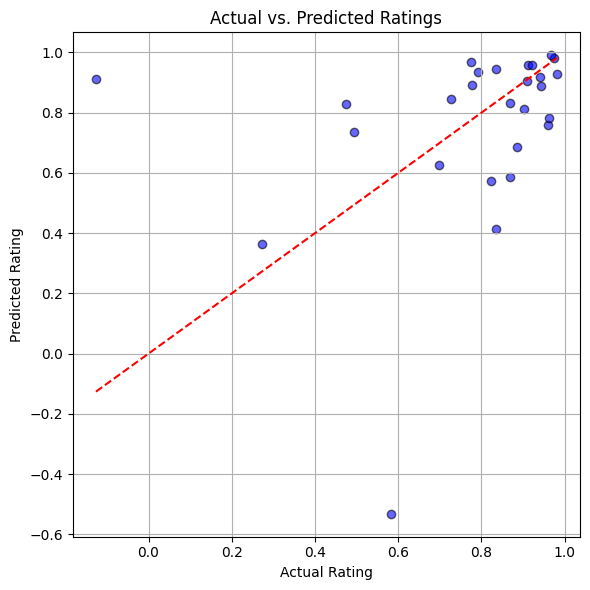

In [63]:
import matplotlib.pyplot as plt
import numpy as np

pred = predict_item_based(user_ratings_train, user_ratings_test, k=5)

filtered = [(a, p) for a, p in pred if not np.isnan(p)]
actuals, preds = zip(*filtered)

# Plotting
plt.figure(figsize=(6, 6))
plt.scatter(actuals, preds, alpha=0.6, color='blue', edgecolor='k')
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', linestyle='--')  # y = x line

plt.title('Actual vs. Predicted Ratings')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.grid(True)
plt.tight_layout()
plt.show()